In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import gc

Label: Fresh, Array shape: (300, 550, 900)


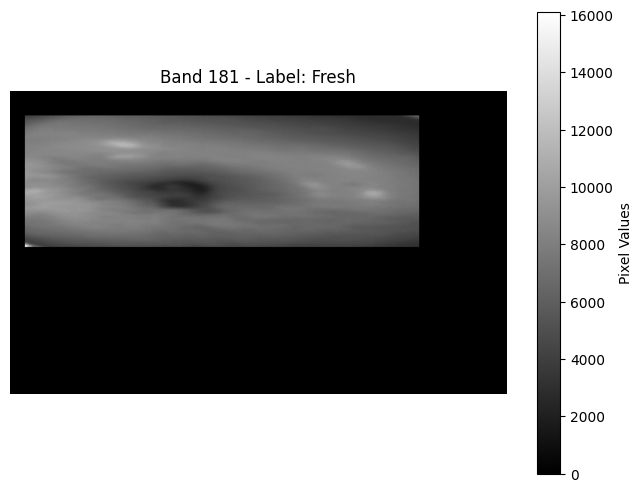

Label: Fresh, Array shape: (300, 550, 900)


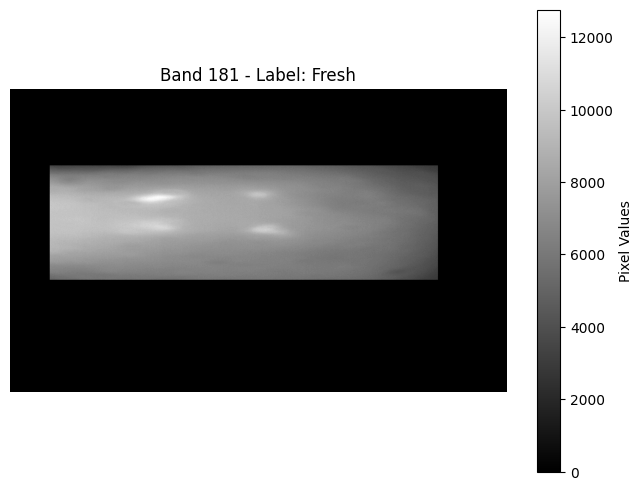

Label: High, Array shape: (300, 550, 900)


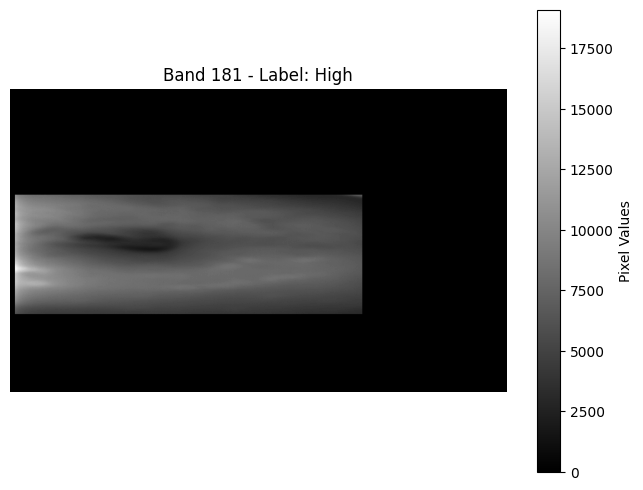

Label: High, Array shape: (300, 550, 900)


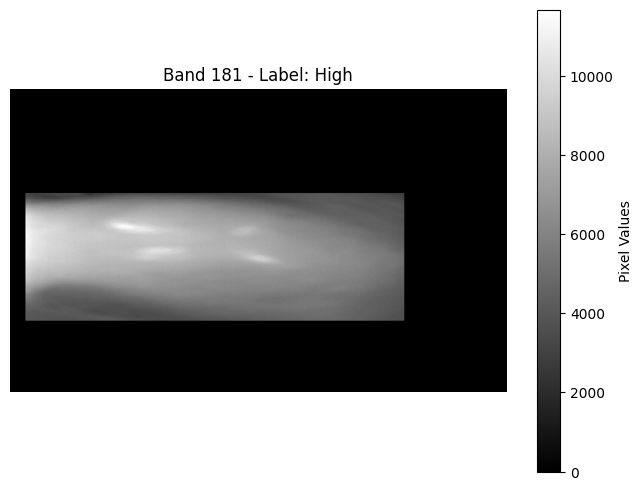

Label: Low, Array shape: (300, 550, 900)


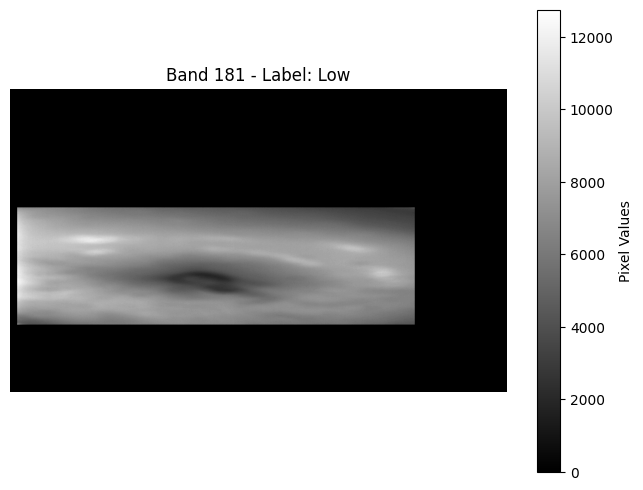

Label: Low, Array shape: (300, 550, 900)


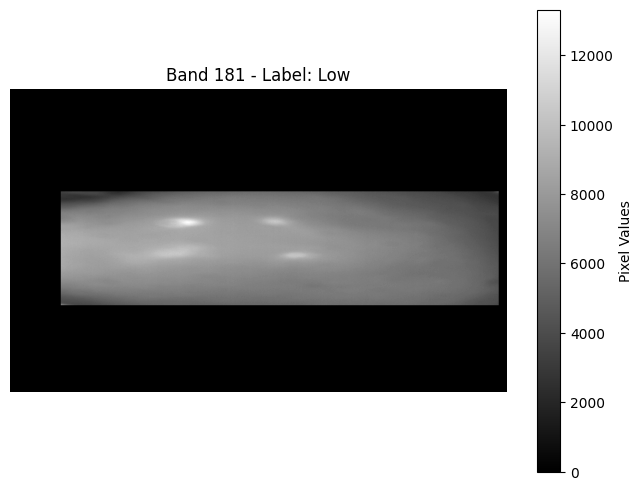

Label: fresh, Array shape: (300, 450, 900)


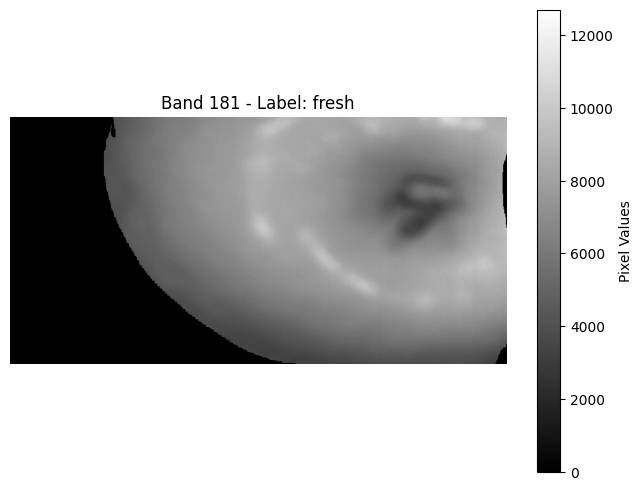

Label: fresh, Array shape: (300, 450, 900)


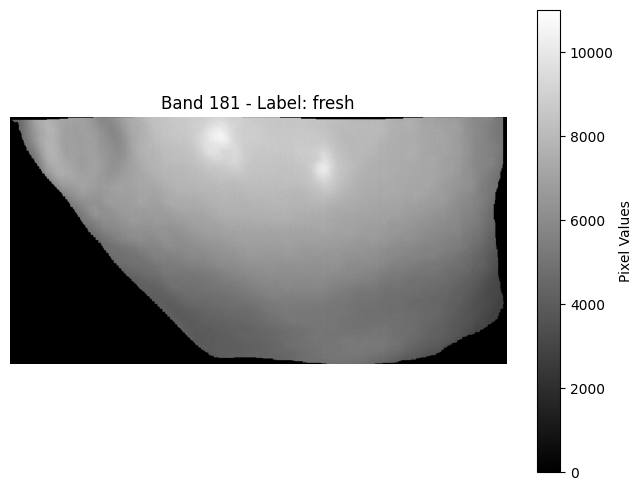

Label: pesticide_unknownconc, Array shape: (300, 450, 900)


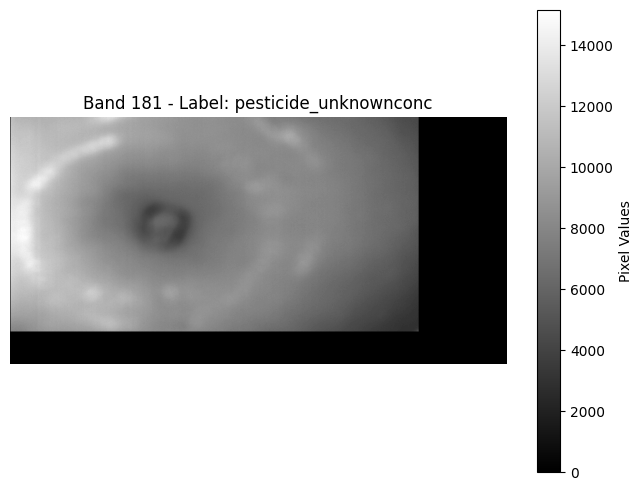

Label: pesticide_unknownconc, Array shape: (300, 450, 900)


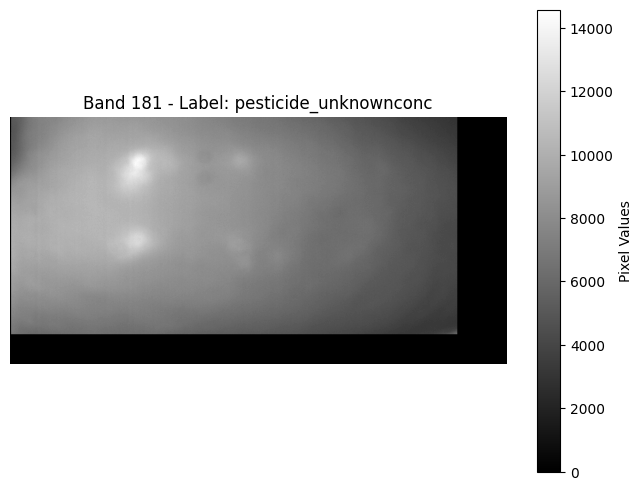

Label: Fresh, Array shape: (300, 450, 900)


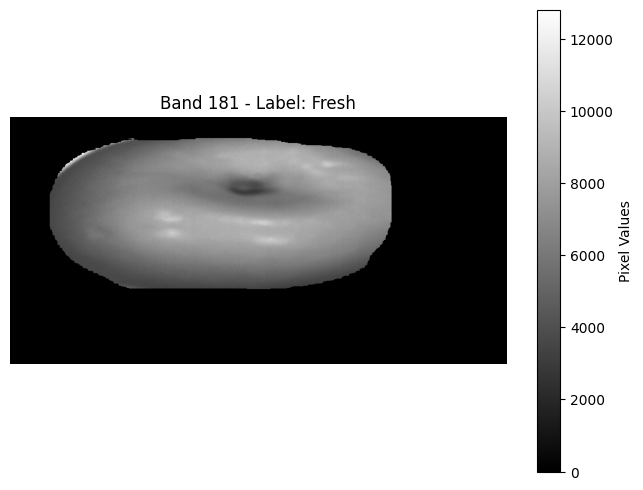

Label: Fresh, Array shape: (300, 450, 900)


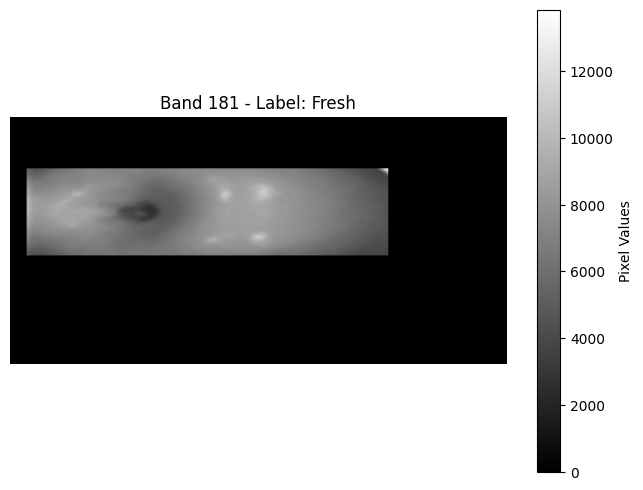

Label: High, Array shape: (300, 450, 900)


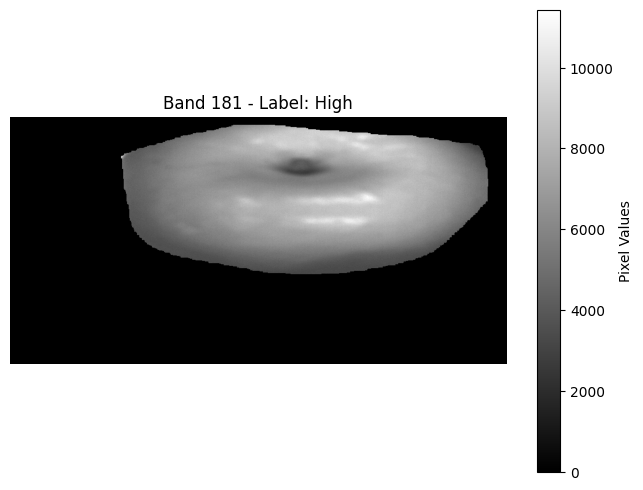

Label: High, Array shape: (300, 450, 900)


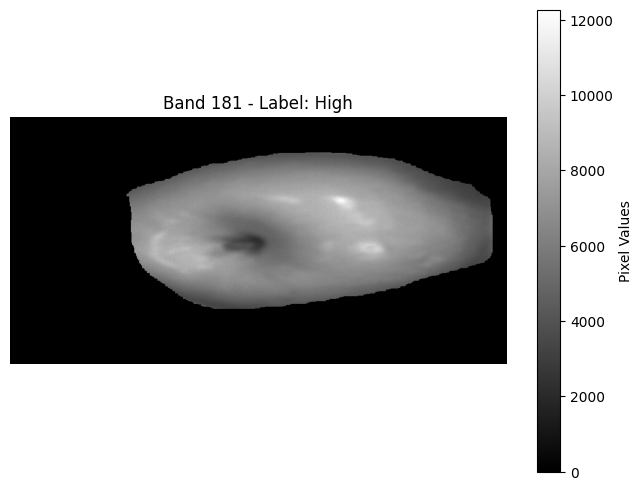

Label: Low, Array shape: (300, 450, 900)


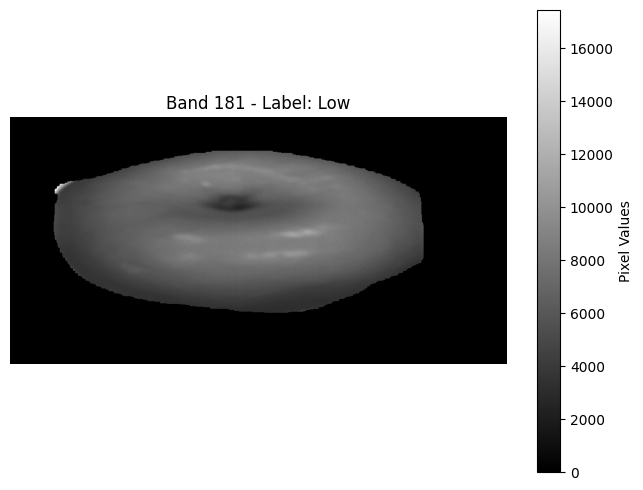

Label: Low, Array shape: (300, 450, 900)


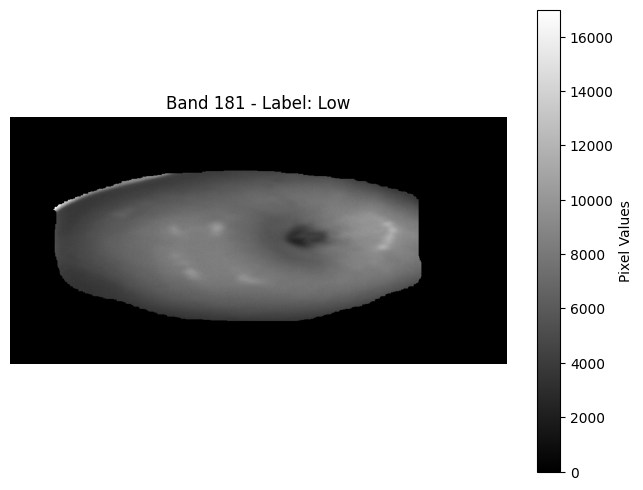

Label: DIB_Apple, Array shape: (300, 600, 900)


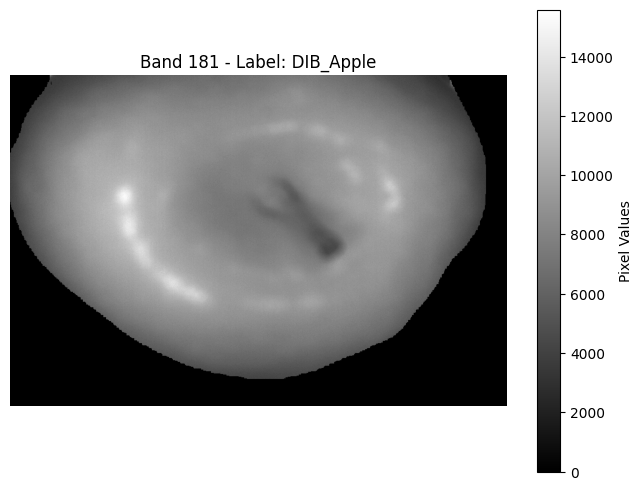

Label: DIB_Apple, Array shape: (300, 600, 900)


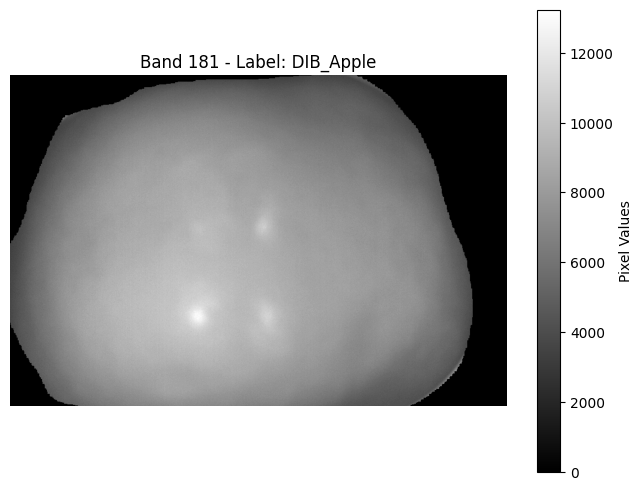

Label: DIB_AppleNativohigh, Array shape: (300, 600, 900)


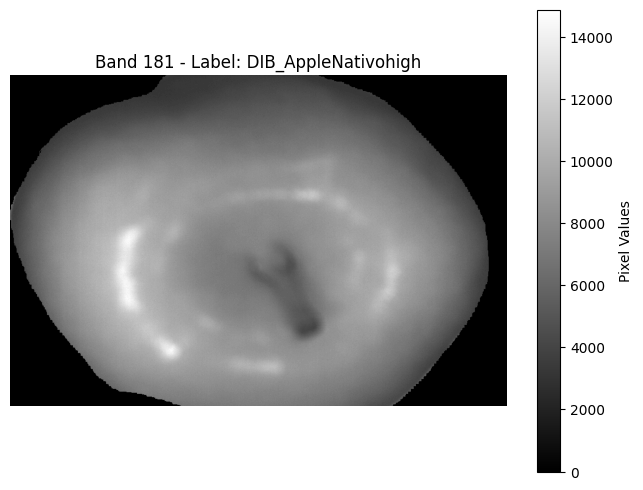

Label: DIB_AppleNativohigh, Array shape: (300, 600, 900)


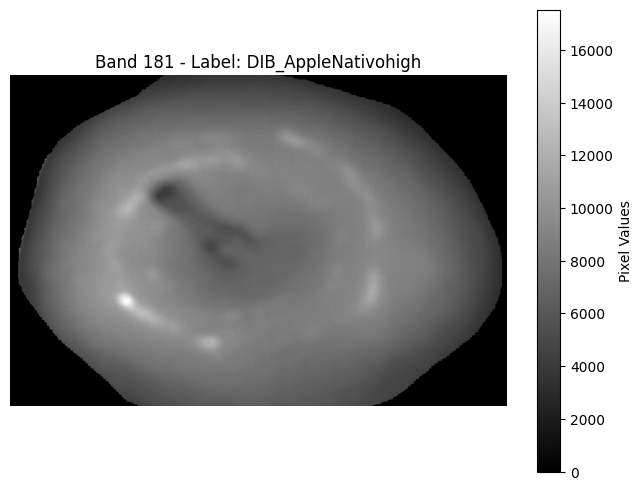

Label: DIB_AppleNativolow, Array shape: (300, 600, 900)


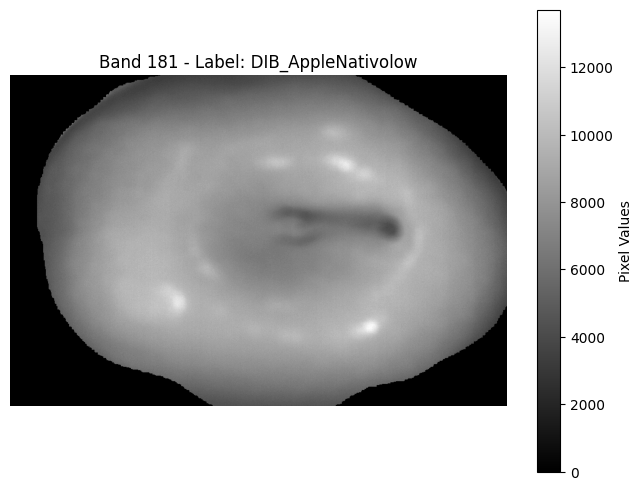

Label: DIB_AppleNativolow, Array shape: (300, 600, 900)


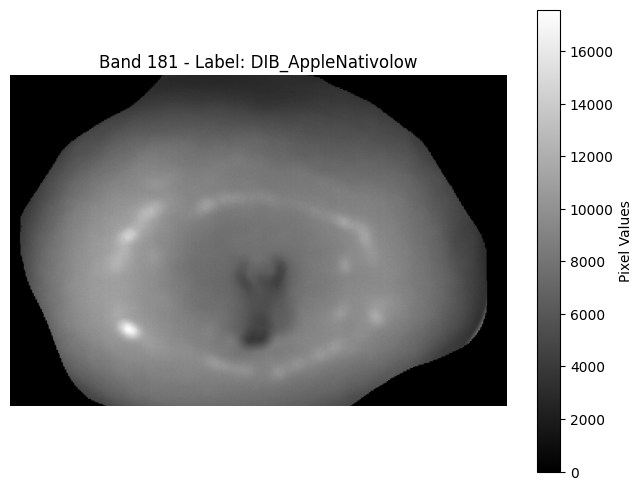

Label: DIB_Applemono, Array shape: (300, 600, 900)


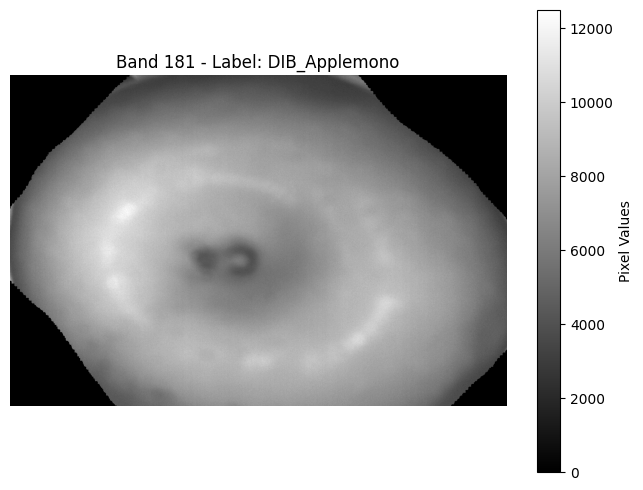

Label: DIB_Applemono, Array shape: (300, 600, 900)


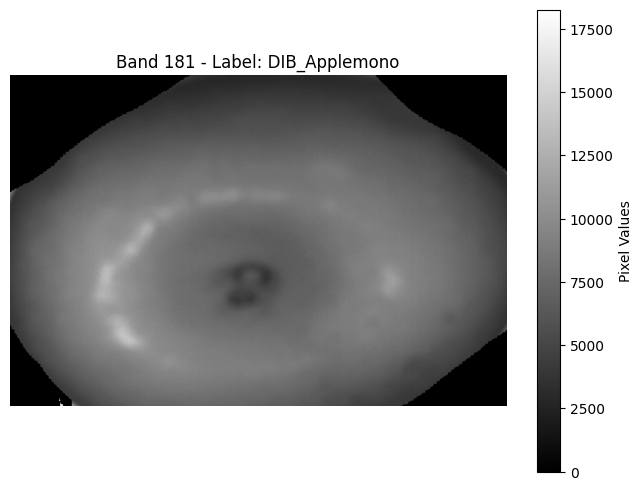

Label: DIB_Applemonohigh, Array shape: (300, 600, 900)


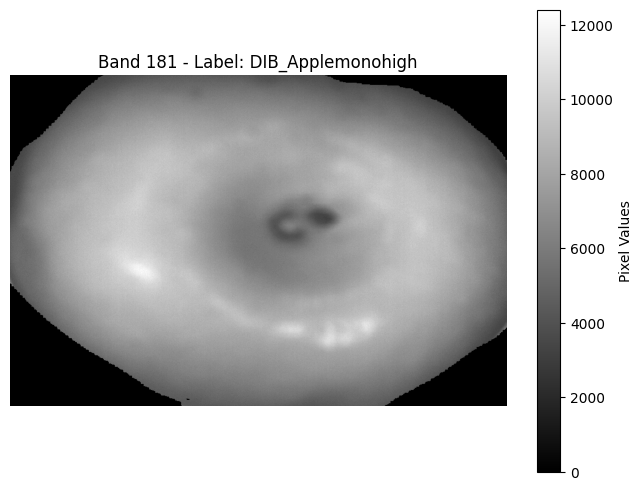

Label: DIB_Applemonohigh, Array shape: (300, 600, 900)


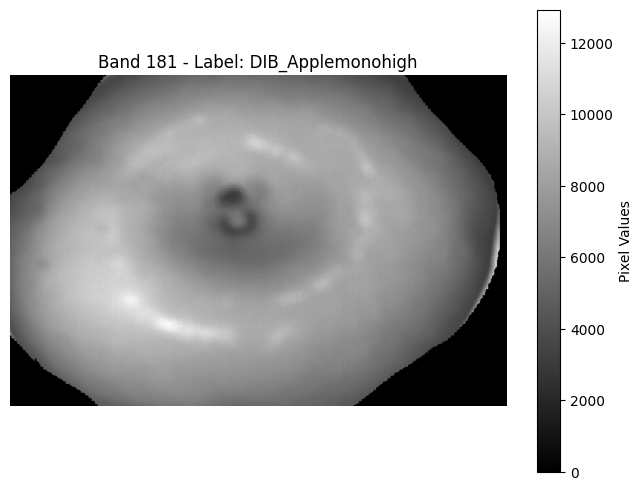

Label: DIB_Applemonolow, Array shape: (300, 600, 900)


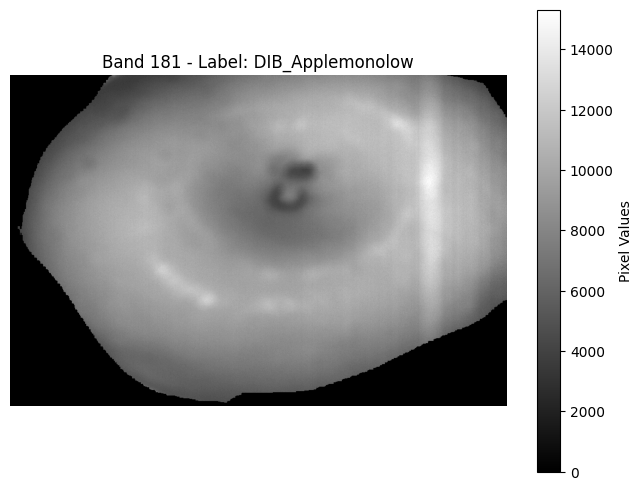

Label: DIB_Applemonolow, Array shape: (300, 600, 900)


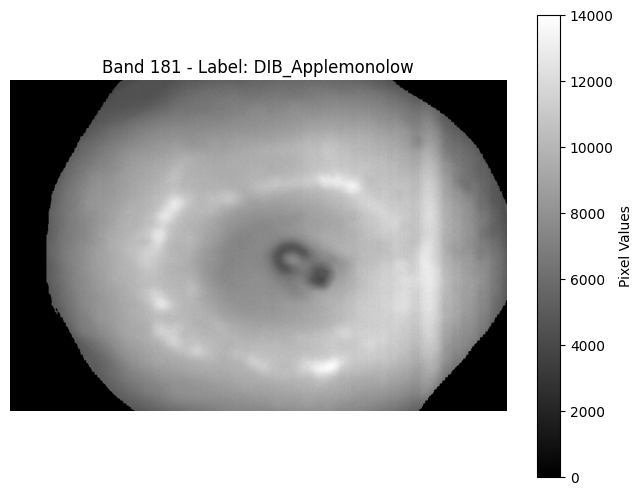

In [5]:
structured_array_path = "structured_array.npy"

# Load structured array
loaded_structured_array = np.load(structured_array_path, allow_pickle=True)

for entry in loaded_structured_array:
    
    print(f"Label: {entry['label']}, Array shape: {entry['array'].shape}")

    band_index = 180
    band_data = entry['array'][band_index]

    plt.figure(figsize=(8, 6))
    plt.imshow(band_data, cmap='gray')
    plt.title(f'Band {band_index + 1} - Label: {entry["label"]}')
    plt.colorbar(label='Pixel Values')
    
    plt.axis('off')
    plt.show()

In [3]:
# Initialize lists for features and labels
features = []
labels = []

for entry in loaded_structured_array:
    
    label = entry['label']
    array = entry['array']

    num_bands = array.shape[0]
    flat_array = array.reshape(num_bands, -1).T

    # Append features and label
    features.extend(flat_array)
    labels.extend([label] * flat_array.shape[0]) 

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [4]:
print(labels)

unique_labels, counts = np.unique(labels, return_counts=True)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

['Fresh' 'Fresh' 'Fresh' ... 'DIB_Applemonolow' 'DIB_Applemonolow'
 'DIB_Applemonolow']


In [5]:
# Delete the structured array
del loaded_structured_array
gc.collect()

10748

In [6]:
data = np.memmap('data.dat', dtype='float32', mode='w+', shape=(13500000, 300))

data[:] = features

data.flush()
print(data[0])  #first row

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
del features
gc.collect()

16

In [8]:
data_2 = np.memmap('data.dat', dtype='float32', mode='r', shape=(13500000, 300))  # 'r' for read-only

In [9]:
# Calculate mean and standard deviation
mean = np.mean(data_2, axis=0)
std = np.std(data_2, axis=0)

# Standardizng
standardized_data = (data_2 - mean) / std


In [10]:
standardized_data.shape

(13500000, 300)

In [11]:
del mean,std
gc.collect()

64

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(standardized_data)

'\nexplained_variance = pca.explained_variance_ratio_\ncumulative_explained_variance = np.cumsum(explained_variance)\n'

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(y_train)

(10800000, 50)
(10800000,)
['High' 'DIB_AppleNativolow' 'DIB_Applemonolow' ... 'DIB_AppleNativolow'
 'Low' 'Low']


In [15]:
#SVM doesnt work
#mem fills up 
'''
optimal_components = np.argmax(cumulative_explained_variance >= 0.99) + 1  # adding 1 because index starts at 0
print(f"Number of components to retain 99% variance: {optimal_components}")
pca = PCA(n_components=optimal_components)
X_train_PCA = pca.fit_transform(X_train)
'''

'\noptimal_components = np.argmax(cumulative_explained_variance >= 0.99) + 1  # adding 1 because index starts at 0\nprint(f"Number of components to retain 99% variance: {optimal_components}")\n\npca = PCA(n_components=optimal_components)\nX_train_PCA = pca.fit_transform(X_train)\n'

In [16]:
'''
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train, y_train)
'''

"\n# Initialize and train the SVM classifier\nsvm_classifier = SVC(kernel='linear') \nsvm_classifier.fit(X_train, y_train)\n"

In [18]:
'''# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
'''

'# Make predictions on the test set\ny_pred = svm_classifier.predict(X_test)\n'

In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
# Val Accuracy
y_test_pred = nb_classifier.predict(X_test)

accuracy = np.mean(y_test_pred == y_test) * 100
print("test Accuracy:", accuracy)

test Accuracy: 36.08522222222222
['High' 'DIB_Applemonohigh' 'DIB_Applemono' ... 'fresh' 'High' 'High']
['Fresh' 'DIB_Applemonolow' 'DIB_AppleNativohigh' ... 'fresh' 'DIB_Apple'
 'Fresh']


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [7],
    'learning_rate': [0.1],
    'n_estimators': [300]
}

# GridSearchCV for XGBoost Classifier
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_encoded)

# Get best parameters for XGBoost Classifier
best_params = xgb_grid_search.best_params_
print("Best Parameters:", best_params)

KeyboardInterrupt: 

In [ ]:
#Accuracy 

y_encoded = label_encoder.fit_transform(y_train)

y_pred = xgb_grid_search.predict(y_test)

correct_predictions = 0
total_predictions = len(y_test)

for pred, true_label in zip(y_pred, y_test):
    
    if pred == true_label:
        
        correct_predictions += 1

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100

print("Accuracy", accuracy)

In [28]:
#KNN classifier

from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    
    'n_neighbors': [7],
    'weights': ['uniform'], 
    'metric': ['euclidean']
}

# KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Training
grid_search.fit(X_train, y_train)

In [ ]:
y_test_pred = grid_search.predict(X_test)

accuracy = np.mean(y_test_pred == y_test) * 100
print("test Accuracy:", accuracy)